# Support Vector Machines Tutorial

In the model the building part, you can use the cancer dataset, which is a very famous multi-class classification problem. This dataset is computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.


The dataset comprises 30 features (mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, and worst fractal dimension) and a target (type of cancer).


This data has two types of cancer classes: malignant (harmful) and benign (not harmful). Here, you can build a model to classify the type of cancer. The dataset is available in the scikit-learn library or you can also download it from the UCI Machine Learning Library.

#### Loading Data, Let's first load the required dataset you will use

In [1]:
#Import scikit-learn dataset library
from sklearn import datasets
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
from scipy import stats

# Import train_test_split function
from sklearn.model_selection import train_test_split

# use seaborn plotting defaults
import seaborn as sns; sns.set()
import os
os.getcwd()

#Load dataset
cancer = datasets.load_breast_cancer()
cancer

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [10]:
# Get the values for partciular keys in cancer dictionary
cancer.get('feature_names')

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

#### Exploring Data
After you have loaded the dataset, you might want to know a little bit more about it. You can check feature and target names.

In [ ]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

# print data(feature)shape
cancer.data.shape

# print the cancer data features (top 5 records)
print(cancer.data[0:5])

# print the cancer labels (0:malignant, 1:benign)
#print(cancer.target)

In [17]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

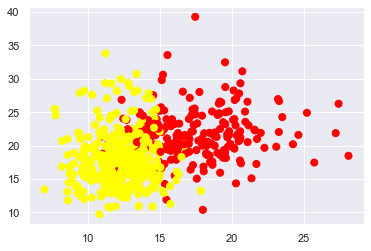

In [11]:
# Visualization 
plt.scatter(cancer.data[:,0], cancer.data[:,1], c=cancer.target, s=50, cmap='autumn');

#### Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Split the dataset by using the function train_test_split(). you need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [16]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

#### Generating Model
Let's build support vector machine model. First, import the SVM module and create support vector classifier object by passing argument kernel as the linear kernel in SVC() function.

Then, fit your model on train set using fit() and perform prediction on the test set using predict().

In [25]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf1 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf1.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf1.predict(X_test)

In [12]:
from sklearn import svm
?svm.SVC

#### Evaluating the Model
Let's estimate how accurately the classifier or model can predict the breast cancer of patients.

Accuracy can be computed by comparing actual test set values and predicted values.

In [26]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


#### check precision and recall of model

In [27]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9811320754716981
Recall: 0.9629629629629629


- Recall is true postive rate.
- Recall is (TP / (TP + FN)) 
- Precision is (TP / (TP + FP))